In [1]:
import pandas as pd
from confidence import *

In [2]:
# Prepare dataset

data = pd.read_csv('~/Datasets/data_banknote_authentication.txt', header=None)
y = data[4]
X = data.drop(4, axis = 1)
y = np.ravel(y)
len(y)

1372

In [3]:
# Add noise by flipping some labels

y[:100] = [not x for x in y[:100]]

In [4]:
print np.unique(y, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
rbtsc = RobustScaler()
X_train = rbtsc.fit_transform(X_train)   # fit + transform
X_test = rbtsc.transform(X_test) 

(array([0, 1]), array([662, 710]))


### All Results in One Graph

Accuracy at threshold 0.0 is 0.520947176685
Accuracy at threshold 0.01 is 0.520947176685
Accuracy at threshold 0.02 is 0.520947176685
Accuracy at threshold 0.03 is 0.533697632058
Accuracy at threshold 0.04 is 0.548269581056
Accuracy at threshold 0.05 is 0.56102003643
Accuracy at threshold 0.06 is 0.566484517304
Accuracy at threshold 0.07 is 0.573770491803
Accuracy at threshold 0.08 is 0.593806921676
Accuracy at threshold 0.09 is 0.612021857923
Accuracy at threshold 0.1 is 0.632058287796
Accuracy at threshold 0.11 is 0.648451730419
Accuracy at threshold 0.12 is 0.659380692168
Accuracy at threshold 0.13 is 0.684881602914
Accuracy at threshold 0.14 is 0.695810564663
Accuracy at threshold 0.15 is 0.726775956284
Accuracy at threshold 0.16 is 0.750455373406
Accuracy at threshold 0.17 is 0.768670309654
Accuracy at threshold 0.18 is 0.774134790528
Accuracy at threshold 0.19 is 0.785063752277
Accuracy at threshold 0.2 is 0.790528233151
Accuracy at threshold 0.21 is 0.795992714026
Accuracy at th

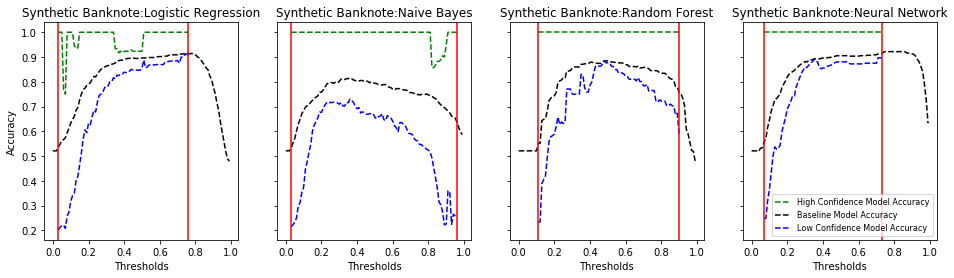

In [6]:
model = perform_logistic_regression(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,4))


ax1.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax1.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax1.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax1.axvline(conf_threshold[0], color='r')
ax1.axvline(conf_threshold[-1], color='r')
ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Accuracy')
ax1.set_title('Synthetic Banknote:Logistic Regression')


model = perform_gaussian_nb(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax2.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax2.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax2.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax2.axvline(conf_threshold[0], color='r')
ax2.axvline(conf_threshold[-1], color='r')
ax2.set_xlabel('Thresholds')
ax2.set_title('Synthetic Banknote:Naive Bayes')



model = perform_random_forest(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax3.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax3.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax3.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax3.axvline(conf_threshold[0], color='r')
ax3.axvline(conf_threshold[-1], color='r')
ax3.set_xlabel('Thresholds')
ax3.set_title('Synthetic Banknote:Random Forest')



model = perform_neural_network(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax4.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax4.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax4.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax4.axvline(conf_threshold[0], color='r')
ax4.axvline(conf_threshold[-1], color='r')
ax4.set_xlabel('Thresholds')
ax4.set_title('Synthetic Banknote:Neural Network')

ax4.legend(loc='best', prop={'size': 8})
plt.show()   
